# Importing a CMS open data file and creating overlaid histograms to analyze data

This activity will help you practice with Jupyter Notebook. It is recommended that you select *Kernel $\rightarrow$ Restart & Clear Output* before going through the notebook. This way you may start fresh without previous outputs.

Select a data file to analyze from [opendata.cern.ch](http://opendata.cern.ch/record/545).
For the example, download Dimuon_DoubleMu.cvs and save it to a folder named *Data*. Note, there are other files available, but the file must be comma separated values (.csv). If the file name has spaces between the words replace them with underscores.

Boxes, like this, that give instruction but not code, can be entered by pressing "b" and selecting "Markdown" from the dropdown menu above. To enter code, select "Code" from the dropdown menu. Cell content may be copied from other sources, pasted and edited.

First, you will need to import the packages pandas and matplotlib.pyplot to be able to read files and plot histogram.

In [1]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

After entering a code box, press *Ctrl + Enter* at the same time to run the code. An asterisk will appear in the *In[ ]* while the command is being processed. Wait until a number appears in that location before proceeding. 
Possible error messages will appear in pink and will indicate information regarding the error. 

To use the file you have downloaded, it must be saved into a variable. Type the file location and name exactly as it appears on your computer. In this example, the file is located one directory up in a folder named *Data*. The path is therefore  *..Data/Dimuon_DoubleMu.csv*.  

Save the data into variable *dataset* and check the contents of the first 5 rows.

In [2]:
dataset = pandas.read_csv('../Data/Dimuon_DoubleMu.csv')

dataset.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


For the given example, the invariant mass is of particular interest. Save the invariant mass column from the *dataset* into a variable *invariant_mass* by using the column heading as it appears in the table, e.g. *M*. If your data set does not contain invariant masses by default you must first [calculate them](https://github.com/cms-opendata-education/cms-jupyter-materials-english/blob/master/Exercises-with-open-data/Calculate-invariant-mass.ipynb). Plot a histogram, stating which variable to plot, setting the number of bins and range.
In the example below, we use 50 bins and plot from 0 to 200 GeV. 

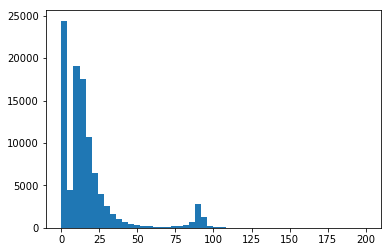

In [3]:
invariant_mass = dataset['M']

plt.hist(invariant_mass, bins=50, range=(0,200))
plt.show()

The number of bins and range can be varied in order to analyze the data more clearly. Below are commands to replot the graph with a title and axis labels.

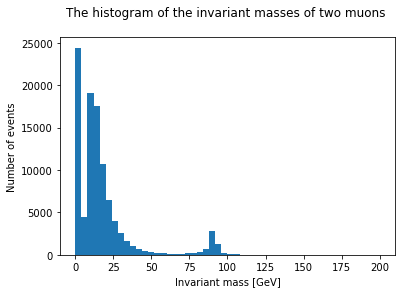

In [4]:
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')
plt.title('The histogram of the invariant masses of two muons \n')

plt.hist(invariant_mass, bins=50, range=(0,200))
plt.show()

The graph above demonstrates background events below approximately 50 GeV and a peak at approximately 90 GeV.


Mathematical operations, such as addition or subtraction, may be performed on the data by defining new variables which allows the data to be further sorted. In the example below, the original data is divided into two new data sets based on the energy of the collision. Each data set is given a name and organized in this case by high energy (> 150 GeV), and low energy (< 150 GeV).


In [5]:
newsethighE = dataset[dataset.E1+dataset.E2>150]
newsetlowE = dataset[dataset.E1+dataset.E2<150]

The new data sets can be plotted separately as was done previously or on one plot. The two histograms can be overlaid by adjusting the transparency using the alpha command. Labels for each data set are included in the legend located in the upper right corner. We can also change the range to focus on the event of interest.

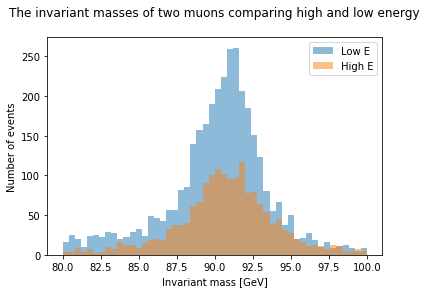

In [7]:
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')
plt.title('The invariant masses of two muons comparing high and low energy\n')
plt.hist(newsetlowE ['M'], bins=50, range=(80,100),alpha=0.5, label='Low E')
plt.hist(newsethighE ['M'], bins=50, range=(80,100),alpha=0.5, label='High E')
plt.legend (loc='upper right')
plt.show()

What do you think will happen if you change the value of energy limit? Try it out by changing the limits in *newsethighE* and *newsetlowE*.